In [1]:
import os
import xarray as xr
import pandas as pd
from iter0 import set_dir_moviedata
from simulation_test import make_consistent_title
import numpy as np
# test data: old_movie = pd.read_pickle('data/movie/old_movie.pkl')
set_dir_moviedata()
from iter import sel_title, sel_year, sel_rows_random, join_movie, save_iter, compare_mental_material
#make_consistent_title(frac =1)

/Users/hyunjimoon/Dropbox/tolzul/BayesSD/ContinuousCode/empirical_dynamics/cont_code/movie/iter.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.year = df.year.astype('int')
/Users/hyunjimoon/Dropbox/tolzul/BayesSD/ContinuousCode/empirical_dynamics/cont_code/movie/iter.py:100: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'year'] = df.year.apply(lambda x: int(x) if str(x).isnumeric() else -1)


             old_id                    title  year
803975    OLD803975              Dog Soldier  2012
2529924  OLD2529924                  What If  2006
1386711  OLD1386711            City of Coral  1985
1987824  OLD1987824  Igor Levit - Mein Liszt  2011
163692    OLD163692      Bellas y ambiciosas  2006
...             ...                      ...   ...
1535140  OLD1535140            Fossile fugle  2000
2180609  OLD2180609             Night Flight  1986
823465    OLD823465         The Camping Trip  1954
1602140    OLD79557            A Better Life  2006
2028423  OLD2028423               Laid Black  1999

[1769520 rows x 3 columns]
             titleId                                     title  year region  \
4186228   tt14066020                               Enes Gezici  1997     TR   
11022177   tt8880930                                 Mixed Bag  2008     \N   
1138378    tt0611475                     The Invincible Weapon  1964    NaN   
6718365   tt21061758                     The

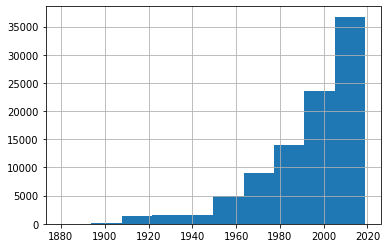

In [2]:
make_consistent_title(frac =1)
#iter1_old = pd.read_pickle('iter2_merged_title_full.pkl')

In [78]:
optin3 = xr.open_dataset("3opting_merged_title_eng_movie.nc")
#old_only4 = xr.open_dataset("4diff_only_old_title.nc")


In [79]:
optin3

<xarray.Dataset>
Dimensions:    (titleId: 7722790)
Coordinates:
  * titleId    (titleId) object 'tt2395981' 'tt0791158' ... 'tt22814692'
Data variables:
    index      (titleId) int64 ...
    old_id     (titleId) object ...
    title      (titleId) object ...
    year       (titleId) int64 ...
    region     (titleId) object ...
    titleType  (titleId) object ...
    soft_eng   (titleId) bool ...

In [80]:
optin3.where(optin3["year"] == 2000, drop=True)

<xarray.Dataset>
Dimensions:    (titleId: 90572)
Coordinates:
  * titleId    (titleId) object 'tt0507447' 'tt0656699' ... 'tt3459432'
Data variables:
    index      (titleId) float64 33.0 67.0 324.0 ... 8.199e+06 8.199e+06
    old_id     (titleId) object OLD72636 OLD988122 OLD2520442 OLD1002153 ...    
    title      (titleId) object Geheimnisvolle Macht ... Wheelin' and Dealin'
    year       (titleId) float64 2e+03 2e+03 2e+03 2e+03 ... 2e+03 2e+03 2e+03
    region     (titleId) object DE ... 
    titleType  (titleId) object tvEpisode tvEpisode ... tvEpisode tvEpisode
    soft_eng   (titleId) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0

In [71]:
a.sel(year = 2000)

KeyError: "no index found for coordinate 'year'"

In [69]:
old_only4.set_coords('year').sel(titleId = tt1527788)
#old_only4.set_coords('year').sel(dict(year = 1993))

NameError: name 'tt1527788' is not defined

In [40]:
old_only4.sel('')

old_only4
 #for coord, isel and sel are the same

<xarray.Dataset>
Dimensions:    (titleId: 93010)
Coordinates:
  * titleId    (titleId) float64 nan nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    index      (titleId) int64 ...
    old_id     (titleId) object ...
    title      (titleId) object ...
    year       (titleId) int64 2012 1993 2013 2012 1992 ... 2002 1989 2006 2013
    region     (titleId) float64 ...
    titleType  (titleId) float64 ...
    soft_eng   (titleId) bool ...

In [32]:
optin3_new = optin3.set_coords(['year', 'title'])
#optin3_new.isel(year=2000)
optin3_new.isel(year = 2000)

ValueError: Dimensions {'year'} do not exist. Expected one or more of Frozen({'titleId': 7722790})

In [39]:
optin3_new

<xarray.Dataset>
Dimensions:    (titleId: 7722790)
Coordinates:
  * titleId    (titleId) object 'tt2395981' 'tt0791158' ... 'tt22814692'
    title      (titleId) object ...
    year       (titleId) int64 ...
Data variables:
    index      (titleId) int64 ...
    old_id     (titleId) object ...
    region     (titleId) object ...
    titleType  (titleId) object ...
    soft_eng   (titleId) bool ...

In [38]:
#optin3_new.isel(year = 2000)
optin3_new.isel(titleId == 'tt1527788')

NameError: name 'titleId' is not defined

In [18]:
old`_only4.sel('year' == 2000)]

ValueError: the first argument to .sel must be a dictionary

In [16]:
join2_filter_g[join2_filter_g.titleId.isnull()] #77k

,index,old_id,title,year,titleId,region,titleType,soft_eng
52,52,OLD2259020,Sandra Munt y la Sociedad Thule,2015,NaN,NaN,NaN,True
67,67,OLD2183758,One by One,2012,NaN,NaN,NaN,True
71,71,OLD1487978,The Wrecker,1968,NaN,NaN,NaN,True
114,114,OLD1473300,Everything Dies,2011,NaN,NaN,NaN,True
118,118,OLD2531047,Xue yi tian shi,1988,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...
1808200,1808200,OLD818051,Spinal Trap,1990,NaN,NaN,NaN,True
1808223,1808223,OLD1648130,Adnan semp-it,2010,NaN,NaN,NaN,True
1808244,1808244,OLD132045,Murder of the Killer,2007,NaN,NaN,NaN,True
1808245,1808245,OLD2260318,Ru Lai Ba Gua Gun,1985,NaN,NaN,NaN,True


In [26]:
df.loc[1, 'title']

'The Rivals'

In [27]:
for id, title in zip(range(df.shape[0]), df.title):
    try:
        df.loc[id, 'strong_eng'] = detect(title)
    except:
        df.loc[id, 'strong_eng'] = np.nan
        print(title)


505
1993
324
4½
329
1988
1988
1988
161
067
141
12:21
$9.99
00:01:18
241
8/10000
422
1997
1990
1990
1.52
2@2
81
1/365
3
5
251
024
027
3:19
600 - 115
010
$600,000
$600,000
24/7
234
215
487
332
332
1-9
7/8
22:43
31
1929
1971
100
444
423
1-900
20
20
Chloe@3AM
25
720°
3:58
1920
008
1983
12
12
9:03
145
063
30 1/2
5:55
3+1=1
15:30:03
180
999
422
271
107
107
315
12
02
100%
235
86
009
1.60
$1.11
19.
14:00
115
115
115
15
290
4.0
555
<--->
457
1962
118
11
339
010101
18
50
$1,000,000
$1,000,000
266
266
3601
9
1929
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
5
5
249
054
025
1945
248
304
1980
$300,000
$300,000
$300,000
$300,000
$300,000
377
154
1984
1984
1981
1992
1992
341
295
344
1+1=2
1+1+1
259
45
09:21:25
059
111
165
129
450
20/2/1991
8
08/15
307
8
$200,000
$200,000
148
4
4
4
12:00
424
7002
299
299
427
427
1984
$400,000
$400,000
$400,000
$400,000
$400,000
$400,000
$400,000
$1,000,000
48
109
3:18
1973
1973
251
301
301
301
10.09.09
360 º
69
102
323
220
71
13:30
402
13:04
$3.52
47
26
1:0
26/9 

In [12]:
ITER = 'optin_opensource_eng'
mo_eng_us_movie = sel_region_type(sel_title(join2, ITER)) # 52k -> 100k
# save_iter(mo_eng_us_movie, ITER, IS_SAVE, IS_PKL)
# compare_mental_material(mo_eng_us_movie, ITER, is_old=True)

LangDetectException: No features in text.

In [ ]:
mo_eng_us_movie

In [ ]:
optino3 = xr.open_dataset("3optino_merged_title_eng_us_movie.nc")
diff4 = xr.open_dataset("4diff_only_old_title.nc")
diff4

<xarray.Dataset>
Dimensions:     (titleId: 0)
Coordinates:
  * titleId     (titleId) float64 
Data variables:
    index       (titleId) int64 ...
    old_id      (titleId) float64 ...
    title       (titleId) float64 ...
    year        (titleId) int64 ...
    region      (titleId) float64 ...
    titleType   (titleId) float64 ...
    strong_eng  (titleId) float64 ...

In [4]:
iter3_optino = pd.read_pickle("iter3_merged_title_eng_us_movie.pkl")

In [6]:
iter3_optino[iter3_optino.titleId.isnull()]

,index,old_id,title,year,titleId,region,titleType,soft_eng


In [7]:
mo

,Unnamed: 0,old_id,title,year,titleId,region,titleType
0,0,OLD1442752,Sticky Business,1987,tt0819407,US,tvEpisode
1,1,OLD2352662,The E.N.D.,2005,tt1437268,US,movie
2,2,OLD2352662,The E.N.D.,2005,tt1437268,\N,movie
3,3,OLD446218,Schone schijn,1999,tt0575194,NaN,tvEpisode
4,4,OLD1922701,History Undercover: The Doomsday Flu,1998,tt0414103,US,tvMovie
...,...,...,...,...,...,...,...
10766288,10766288,NaN,Blindfolded Pizza Challenge,2014,tt5524856,NaN,tvEpisode
10766289,10766289,NaN,Einfach leben - glücklich leben?,2004,tt20453860,NaN,tvEpisode
10766290,10766290,NaN,Louis Riddick/Josh Allen,2020,tt13727222,NaN,tvEpisode
10766291,10766291,NaN,Episode #1.6451,1981,tt12720436,NaN,tvEpisode


In [9]:
mo_dup = mo[mo.duplicated(subset=['old_id', 'titleId'])]
# mo.drop_duplicates(subset=['old_id', 'titleId'], keep='first', inplace=True, ignore_index=True)

In [10]:
mo_dup[mo_dup.title == 'Ajeossi']

,Unnamed: 0,old_id,title,year,titleId,region,titleType
1191284,1191284,OLD1687553,Ajeossi,2010,tt1527788,SE,movie
1191285,1191285,OLD1687553,Ajeossi,2010,tt1527788,AE,movie
1191286,1191286,OLD1687553,Ajeossi,2010,tt1527788,KR,movie
1191287,1191287,OLD1687553,Ajeossi,2010,tt1527788,IN,movie
1191288,1191288,OLD1687553,Ajeossi,2010,tt1527788,CA,movie


In [17]:
mo1 = mo.drop_duplicates(subset=['old_id', 'titleId'], keep='first', inplace=True, ignore_index=True)

In [18]:
mo1

In [14]:
mo1[mo1.title == 'Ajeossi']

AttributeError: 'NoneType' object has no attribute 'title'

In [5]:
mo_eng_us_movie = sel_region_type(sel_title(merged_title_iter1, 1, characters = ['Pilot', 'Finale'])) # 169k -> 65879
mo_eng_us_movie.shape[0]

65879

In [6]:
mo_eng_us_movie

,index,old_id,title,year,titleId,region,titleType
16,16,OLD2439135,The Man Behind the Door,1914,tt0005692,US,movie
19,19,OLD2209006,Safe House,1999,tt0183734,US,movie
76,76,OLD1885719,Diary of a Co-Worker,2005,tt0490892,US,movie
151,151,OLD2479214,The Red Lane,1920,tt0011616,US,movie
247,247,OLD2176487,Love from Paris,1970,tt0143480,US,movie
...,...,...,...,...,...,...,...
8199548,8199548,NaN,Lady Hyde,2022,tt21001736,US,movie
8199889,8199889,NaN,The Girlfriend Project,2022,tt6385442,US,movie
8200049,8200049,NaN,One Cent Can't Change,2022,tt18311364,US,movie
8202123,8202123,NaN,Bundles the Movie,2022,tt21854866,US,movie


In [7]:
mo_eng_us_movie[mo_eng_us_movie.titleId.isnull()]

,index,old_id,title,year,titleId,region,titleType


In [8]:
mo_eng_us_movie[mo_eng_us_movie.old_id.isnull()]

,index,old_id,title,year,titleId,region,titleType
1814411,1814411,NaN,For the Birds,2016,tt6017950,US,movie
1814414,1814414,NaN,The Arab Americans,2015,tt2369365,US,movie
1814559,1814559,NaN,Valerian and the City of a Thousand Planets,2017,tt2239822,US,movie
1814713,1814713,NaN,Love of a Lifetime,2017,tt4478324,US,movie
1817523,1817523,NaN,The Callback,2021,tt13539840,US,movie
...,...,...,...,...,...,...,...
8199548,8199548,NaN,Lady Hyde,2022,tt21001736,US,movie
8199889,8199889,NaN,The Girlfriend Project,2022,tt6385442,US,movie
8200049,8200049,NaN,One Cent Can't Change,2022,tt18311364,US,movie
8202123,8202123,NaN,Bundles the Movie,2022,tt21854866,US,movie


In [9]:
merged_title_eng_us_movie = pd.read_pickle("merged_title_eng_us_movie.pkl")

In [10]:
pd.read_pickle("only_old_title.pkl")

,index,old_id,title,year,titleId,region,titleType,soft_eng


In [11]:
os.getcwd()

'/Users/hyunjimoon/Dropbox/tolzul/BayesSD/ContinuousCode/3_Data4DM/empirical_dynamics/cont_code/data/movie'